In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
img_path = "/content/IMG_5154.JPG"  # Corrected path

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_path1 = "/content/IMG_5152.PNG"
img1= cv2.imread(img_path1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

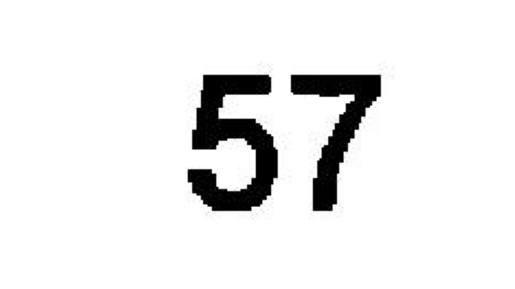

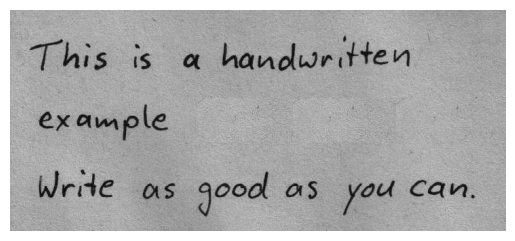

In [ ]:
plt.imshow(img)
plt.axis("off")
plt.show()
plt.imshow(img1)
plt.axis("off")
plt.show()
#this is the original image

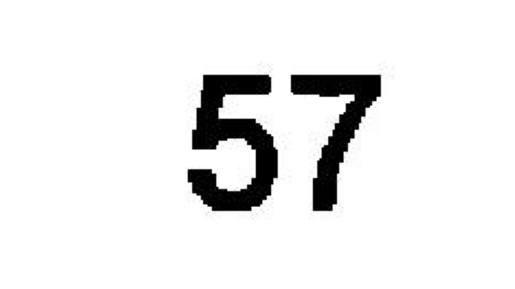

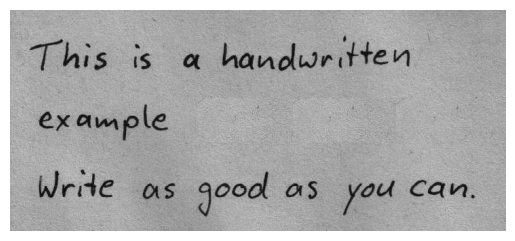

In [ ]:
if img.shape[2] == 4:
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
plt.imshow(img)
plt.axis("off")
plt.show()
if img1.shape[2] == 4:
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGRA2BGR)
plt.imshow(img1)
plt.axis("off")
plt.show()
#image after transparency handling

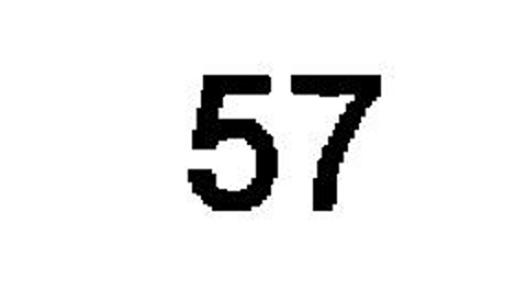

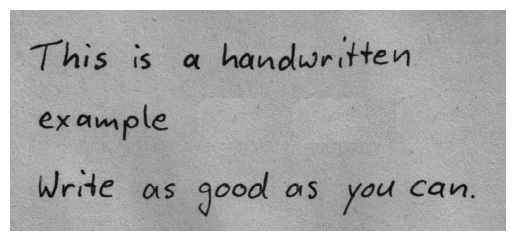

In [ ]:
img = cv2.resize(
img,
None,
fx=2.0,fy=2.0,
interpolation=cv2.INTER_CUBIC
)
plt.imshow(img)
plt.axis("off")
plt.show()
img1 = cv2.resize(
img1,
None,
fx=2.0,fy=2.0,
interpolation=cv2.INTER_CUBIC
)
plt.imshow(img1)
plt.axis("off")
plt.show()
#image after resizing

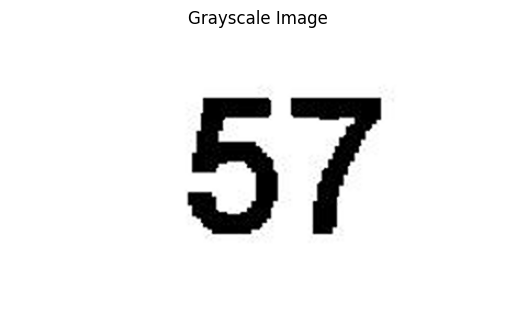

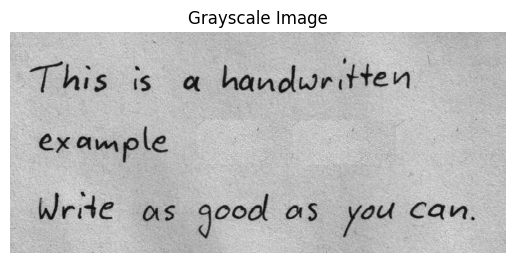

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.show()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.show()
#grayscale image


In [ ]:
denoised = cv2.GaussianBlur(
gray,
(3, 3),
0
)
denoised1 = cv2.GaussianBlur(
gray1,
(3, 3),
0
)

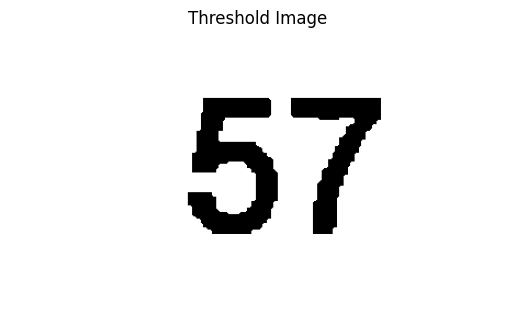

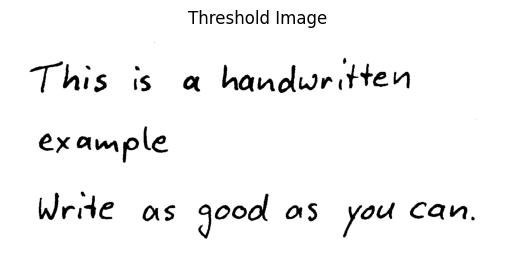

In [ ]:
_, thresh = cv2.threshold(
denoised,
0,
255,
cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
_, thresh1 = cv2.threshold(
denoised1,
0,
255,
cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
plt.imshow(thresh, cmap='gray')
plt.title("Threshold Image")
plt.axis("off")

plt.show()
plt.imshow(thresh1, cmap='gray')
plt.title("Threshold Image")
plt.axis("off")

plt.show()
#manual thresholding because there is no any shadow in the image

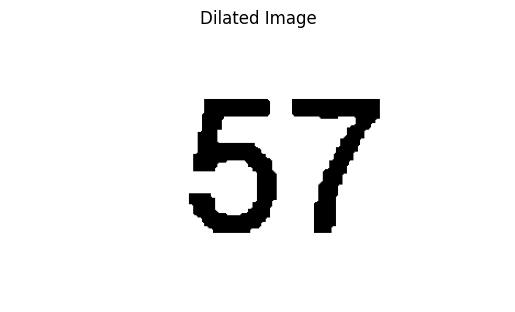

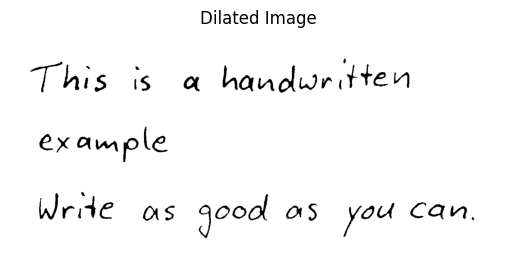

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilated = cv2.dilate(thresh, kernel, iterations=1)
plt.imshow(dilated, cmap='gray')
plt.title("Dilated Image")
plt.axis("off")
plt.show()
dilated1 = cv2.dilate(thresh1, kernel, iterations=1)
plt.imshow(dilated1, cmap='gray')
plt.title("Dilated Image")
plt.axis("off")
plt.show()
#just checking the dilation effect

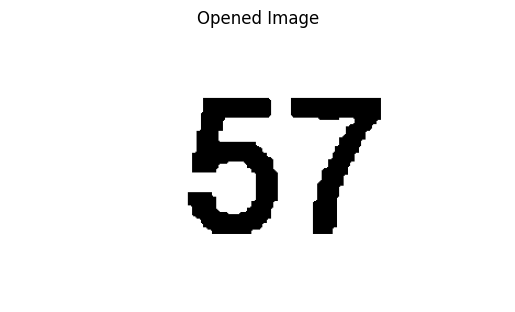

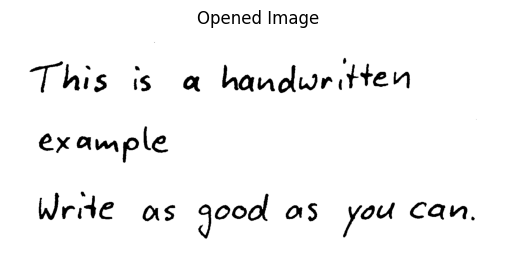

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.imshow(opened, cmap='gray')
plt.title("Opened Image")
plt.axis("off")
plt.show()
opened1 = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)

plt.imshow(opened1, cmap='gray')
plt.title("Opened Image")
plt.axis("off")
plt.show()


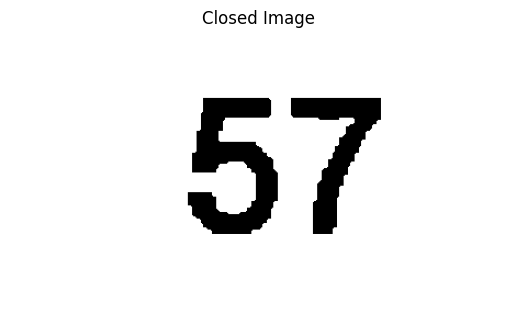

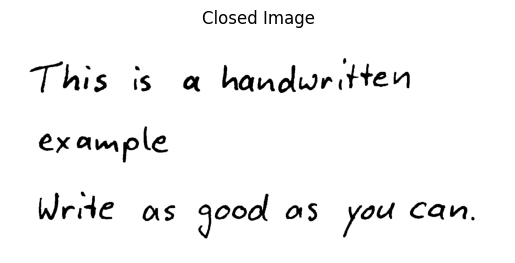

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed, cmap='gray')
plt.title("Closed Image")
plt.axis("off")
plt.show()
closed1 = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed1, cmap='gray')
plt.title("Closed Image")
plt.axis("off")
plt.show()

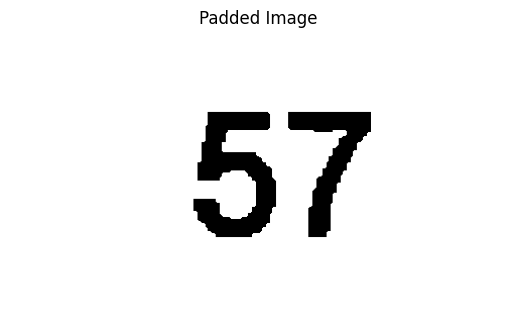

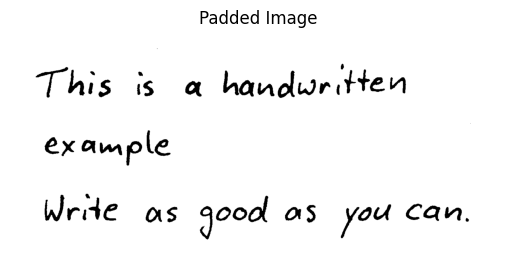

In [ ]:
padded = cv2.copyMakeBorder(
opened,
20, 20, 20, 20,
cv2.BORDER_CONSTANT,
value=255
)
plt.imshow(padded, cmap='gray')
plt.title("Padded Image")
plt.axis("off")
plt.show()
padded1 = cv2.copyMakeBorder(
opened1,
20, 20, 20, 20,
cv2.BORDER_CONSTANT,
value=255
)
plt.imshow(padded1, cmap='gray')
plt.title("Padded Image")
plt.axis("off")
plt.show()

In [ ]:
!sudo apt update
!sudo apt install tesseract-ocr
!pip install pytesseract

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,867 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,205 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,599 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [6,411 kB]
Get:14 ht

In [ ]:
import pytesseract

# Apply OCR with PSM modes
text = pytesseract.image_to_string(
    padded,
    config="--psm 8"
#in this we will use psm 8 because this is only a single word
)

print(text)
text1 = pytesseract.image_to_string(
    padded1,
    config="--psm 6"
    #use psm 6 because of block of text
)

print(text1)


57

This is a handuritten
example
Write as qoool as you Can.



In [ ]:
!pip install jiwer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 16.6 MB/s eta 0:00:00


In [ ]:
from jiwer import wer, cer

ground_truth = "57"
ocr_output = "57"

cer_value = cer(ground_truth, ocr_output)
wer_value = wer(ground_truth, ocr_output)

print("CER:", cer_value)
print("WER:", wer_value)
ground_truth = "This is a handwritten example Write as good as you can."
ocr_output = "This is a handuritten example Write as qoool as you Can."

cer_value = cer(ground_truth, ocr_output)
wer_value = wer(ground_truth, ocr_output)

print("CER1:", cer_value)
print("WER1:", wer_value)



CER: 0.0
WER: 0.0
CER1: 0.09090909090909091
WER1: 0.2727272727272727
